In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('../code')

# Load custom functions
from interpolation import cfl_interpolation5
from diusst_funcs import make_mesh
from diusst_model5 import diusst_bayesian as diusst
from diusst_eulerc import diusst_eulerc
from diusst_funcs import *
from simu_eulerc import simulate_eulerc

In [35]:
# DIUSST model
k0 = 0.8
lambd = 3
z_f = 10
T_f = 300
dz0 = 0.10
ngrid = 40
diffu = 1
opac = 1
k_mol = 1e-7
maxwind = 10
ref_level = int(21)

In [36]:
params = [7.391954640890024e-05, 0.0035497250908049435, 2.314444021159577,k0,lambd]

In [37]:
test = simulate_eulerc(params,dz0=dz0,ngrid=ngrid,windcos=0,windstrength=0)

Done, took  0.5325813293457031


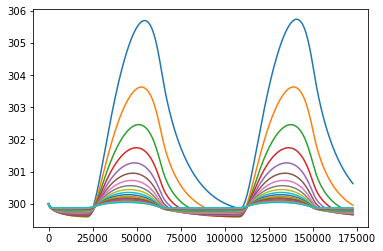

In [38]:
for i in range(len(winds)):
    plt.plot(windsim[i][2],windsim[i][0][:,0])

In [39]:
winds = np.arange(0.5,10.5,0.5)
windsim = []
ampmax0m = []
ampmax1m = []
for i in range(len(winds)):
    windsim.append(simulate_eulerc(params,dz0=dz0,ngrid=ngrid,windcos=0,windstrength=winds[i]-1))
    ampmax0m.append(np.amax(windsim[i][0][:,0]-T_f))
    ampmax1m.append(np.amax(windsim[i][0][:,10]-T_f))

Done, took  0.5317692756652832
Done, took  0.5304901599884033
Done, took  0.5263099670410156
Done, took  0.5404646396636963
Done, took  0.5312461853027344
Done, took  0.5325963497161865
Done, took  0.5309126377105713
Done, took  0.5264835357666016
Done, took  0.5285453796386719
Done, took  0.5325815677642822
Done, took  0.5750918388366699
Done, took  0.687467098236084
Done, took  0.7657132148742676
Done, took  0.9344842433929443
Done, took  1.0240652561187744
Done, took  1.1620829105377197
Done, took  1.3106744289398193
Done, took  1.477724552154541
Done, took  1.6441128253936768
Done, took  1.7954425811767578


In [40]:
ampmax0m

[5.735515014168243,
 3.6319537378806217,
 2.461061066262687,
 1.7418040328432767,
 1.2716899750936363,
 0.9513736025620005,
 0.7259669263034425,
 0.5630808139541159,
 0.4426801798267661,
 0.3519145793580378,
 0.2822918343273386,
 0.22806385215636737,
 0.18524677174912085,
 0.1510251541592993,
 0.12337438864392425,
 0.10081423758458641,
 0.08224632186505687,
 0.06684409494772581,
 0.05397768358676558,
 0.043161441082304464]

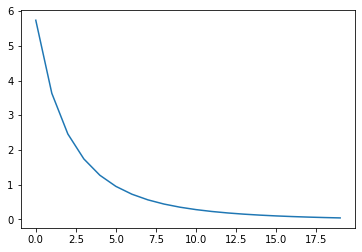

In [41]:
plt.plot(ampmax0m)

In [42]:
make_mesh(dz0,ngrid)[0][10]

-1.067671706935913

In [43]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

def linear(x,a,b):
    return a*x + b

def expo(x,a,b):
    return b*np.exp(a*x)

In [66]:
lsq0 = LeastSquares(winds[1:],ampmax0m[1:],np.array(ampmax0m)[0]*0.001, expo)
m0 = Minuit(lsq0, -0.3, 3, name=["a","b"])
m0.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 2940                       │              Nfcn = 51               │
│ EDM = 1.13e-06 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -0.6362  │  0.0015   │            │            │         │         │       │
│ 1 │ b    │   6.622   │   0.018   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │   2.4e-06 -2.48e-05 │
│ b │ -2.48e-05  0.000312 │
└───┴─────────────────────┘

In [67]:
len(ampmax0m)

20

In [68]:
lsq1 = LeastSquares(winds[2:],ampmax1m[2:],np.array(ampmax1m)[0]*0.001, expo)
m1 = Minuit(lsq1, -0.3, 3, name=["a","b"])
m1.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 6735                       │              Nfcn = 54               │
│ EDM = 1.46e-06 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │-380.98e-3 │  0.24e-3  │            │            │         │         │       │
│ 1 │ b    │  2.7137   │  0.0019   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │  5.91e-08 -4.12e-07 │
│ b │ -4.12e-07  3.58e-06 │
└───┴─────────────────────┘

In [69]:
-307e-3

-0.307

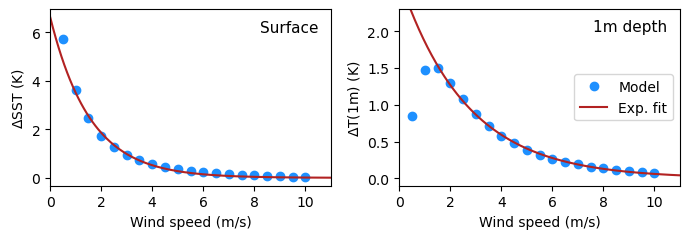

In [101]:
x = np.linspace(0,11,200)

fig, ax = plt.subplots(1,2,dpi=100,figsize=(7,2.5))
ax[0].plot(winds,ampmax0m,'o',c='dodgerblue',label='Model')
ax[0].plot(x,expo(x,*m0.values),c='firebrick',label='Exp. fit')

#ax[0].plot(x,expo(x,-0.518,m0.values[1]))

ax[1].plot(winds,ampmax1m,'o',c='dodgerblue',label='Model')
ax[1].plot(x,expo(x,*m1.values),c='firebrick',label='Exp. fit')
#ax[1].plot(x,expo(x,-0.35,m1.values[1]))
ax[1].set(ylim=(-0.1,2.3),xlim=(0,11))
ax[0].set(xlim=(0,11))
ax[1].legend(loc='center right')

ax[0].set(ylabel='$\Delta$SST (K)',xlabel='Wind speed (m/s)')
ax[1].set(ylabel='$\Delta$T(1m) (K)',xlabel='Wind speed (m/s)')
ax[0].text(10.5,6,'Surface',fontsize=11,ha='right')
ax[1].text(10.5,2,'1m depth',fontsize=11,ha='right')
ax[1].set_title=('1m depth')

fig.tight_layout()

#plt.savefig('../../Masterarbeit/thesis/figs/both-winddependence.pdf')